In [1]:
# import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read data
city_df = pd.read_csv('raw_data\\city_data.csv')
ride_df = pd.read_csv('raw_data\\ride_data.csv')

In [3]:
# drop duplicate cities from the city data
city_df.drop_duplicates(subset='city',inplace=True)

In [4]:
# inner merge city data and ride data with city as the key
merged_df = pd.merge(ride_df,city_df,on='city',how='inner')
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [5]:
# get number of drivers per city for each city type
driver_count_urban = city_df[city_df['type'] == 'Urban'].loc[:,'driver_count']
driver_count_suburban = city_df[city_df['type'] == 'Suburban'].loc[:,'driver_count']
driver_count_rural = city_df[city_df['type'] == 'Rural'].loc[:,'driver_count']

In [6]:
# get average fare per city for each city type
average_fare_urban = merged_df[merged_df['type'] == 'Urban'].groupby('city')['fare'].mean()
average_fare_suburban = merged_df[merged_df['type'] == 'Suburban'].groupby('city')['fare'].mean()
average_fare_rural = merged_df[merged_df['type'] == 'Rural'].groupby('city')['fare'].mean()

In [7]:
# get number of rides per city for each city type
ride_urban = merged_df[merged_df['type'] == 'Urban'].groupby('city')['ride_id'].count()
ride_suburban = merged_df[merged_df['type'] == 'Suburban'].groupby('city')['ride_id'].count()
ride_rural = merged_df[merged_df['type'] == 'Rural'].groupby('city')['ride_id'].count()

In [8]:
# define the limit of x axis
x_limit = merged_df.groupby('city')['ride_id'].count().max() + 2
# define the lower and upper limit of y axis
y_limit_l = merged_df.groupby('city')['fare'].mean().min() -2
y_limit_u = merged_df.groupby('city')['fare'].mean().max() + 2

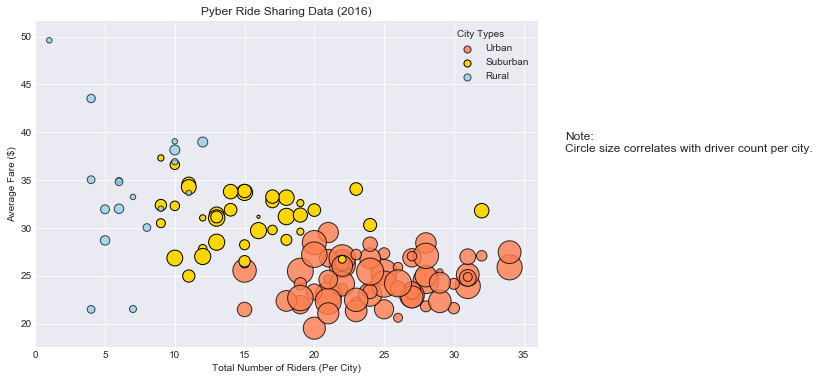

In [9]:
# select Seaborn plotting style
sns.set_style("dark")
# create a figure and subplot
fig, ax = plt.subplots(figsize=(9,6))
# add grid
plt.grid()
# add subplot title, x axis and y axis labels
ax.set_title('Pyber Ride Sharing Data (2016)')
ax.set_xlabel('Total Number of Riders (Per City)')
ax.set_ylabel('Average Fare ($)')
# set x axis and y axis limits
ax.set_xlim(0,x_limit)
ax.set_ylim(y_limit_l,y_limit_u)
# plot bubble chart (with scatter) for urban, suburban and rural data, set color, edge and linewidth
plt.scatter(ride_urban,average_fare_urban,driver_count_urban*10,color='coral',alpha=0.8,edgecolor='k',linewidth=1)
plt.scatter(ride_suburban,average_fare_suburban,driver_count_suburban*10,color='gold',edgecolor='k',linewidth=1)
plt.scatter(ride_rural,average_fare_rural,driver_count_rural*10,color='skyblue',alpha=0.7,edgecolor='k',linewidth=1)
# add subplot legend and legend's title
lgnd = plt.legend(['Urban','Suburban','Rural'],title='City Types')
# change the legend size to be consistent
for handle in lgnd.legendHandles:
    handle.set_sizes([50])
# align legend's title to left
lgnd._legend_box.align = "left"
# add a text of note to the right of the subplot
ax.text(38, 38, r'Note:' + '\nCircle size correlates with driver count per city.',fontsize=12)
# show plot
plt.show()

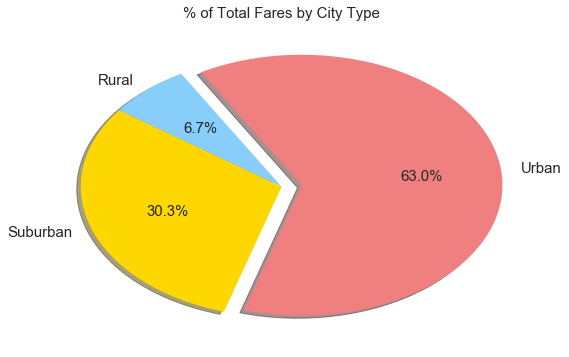

In [10]:
# get total fare by city type
fare_by_city = merged_df.groupby('type')['fare'].sum()
# define explode parameters
explodes = (0, 0, 0.1)
# define colors of wedges
color = ['lightskyblue','gold','lightcoral']
# create a figure
plt.figure(figsize=(9,6))
# create a pie chart for total fare by city type, with shadow, wedge % and wedge labels
patches, texts, autotexts = plt.pie(fare_by_city,explode=explodes,colors=color,startangle=120,
                                    shadow=True,autopct='%.1f%%',labels=fare_by_city.keys())
# change the font of wedge % and labels
for text in autotexts:
    text.set_fontsize(15)
for text in texts:
    text.set_fontsize(15)
# create plot title
plt.title('% of Total Fares by City Type',fontsize=15)
# show plot
plt.show()

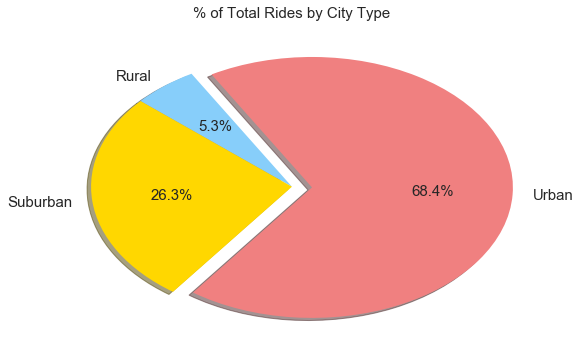

In [11]:
# get total ride by city type
ride_by_city = merged_df.groupby('type')['ride_id'].count()
# create a figure
plt.figure(figsize=(9,6))
# create a pie chart for total ride by city type, with shadow, wedge % and wedge labels
patches, texts, autotexts = plt.pie(ride_by_city,explode=explodes,colors=color,startangle=120,
                                    shadow=True,autopct='%.1f%%',labels=ride_by_city.keys())
# change the font of wedge % and labels
for text in autotexts:
    text.set_fontsize(15)
for text in texts:
    text.set_fontsize(15)
# create plot title
plt.title('% of Total Rides by City Type',fontsize=15)
# show plot
plt.show()

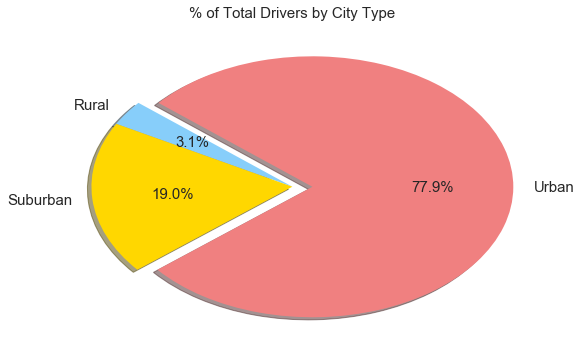

In [12]:
# get total drivers by city type
driver_by_city = city_df.groupby('type')['driver_count'].sum()
# create a figure
plt.figure(figsize=(9,6))
# create a pie chart for total ride by city type, with shadow, wedge % and wedge labels
patches, texts, autotexts = plt.pie(driver_by_city,explode=explodes,colors=color,startangle=140,
                                    shadow=True,autopct='%.1f%%',labels=driver_by_city.keys())
# change the font of wedge % and labels
for text in autotexts:
    text.set_fontsize(15)
for text in texts:
    text.set_fontsize(15)
# create plot title
plt.title('% of Total Drivers by City Type',fontsize=15)
# show plot
plt.show()